In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/hhodzic/Downloads/184-702-tu-ml-2025-s-breast-cancer-diagnostic/breast-cancer-diagnostic.shuf.lrn.csv')

# Display the first few rows and column names
print(df.head())
print(df.columns)
print(df.shape)

         ID  class  radiusMean   textureMean   perimeterMean   areaMean  \
0    886452   True       13.96         17.05           91.43      602.4   
1  84348301   True       11.42         20.38           77.58      386.1   
2   9012795   True       21.37         15.10          141.30     1386.0   
3    894326   True       18.22         18.87          118.70     1027.0   
4    867387  False       15.71         13.93          102.00      761.7   

    smoothnessMean   compactnessMean   concavityMean   concavePointsMean  ...  \
0          0.10960           0.12790         0.09789             0.05246  ...   
1          0.14250           0.28390         0.24140             0.10520  ...   
2          0.10010           0.15150         0.19320             0.12550  ...   
3          0.09746           0.11170         0.11300             0.07950  ...   
4          0.09462           0.09462         0.07135             0.05933  ...   

    radiusWorst   textureWorst   perimeterWorst   areaWorst   

## Data Preprocessing

This section handles the initial data cleaning process:
- Replaces placeholder values such as "?" with NaN.
- Converts columns to numeric types where possible.
- Checks for missing values and empty strings in object columns.
- Scans for placeholder strings like "NA", "null", and "None".
- Displays basic descriptive statistics for numeric features.

This ensures that the dataset is clean and ready for further preprocessing and modeling.


In [2]:
import numpy as np
import pandas as pd

# 1. Replace "?" with NaN
df.replace("?", np.nan, inplace=True)

# 2. Convert columns to numeric where possible
df = df.apply(pd.to_numeric, errors='ignore')

# 3. Missing values per column
print("🔍 Missing (NaN) values per column:")
print(df.isnull().sum())

# 4. Empty strings in object columns
object_cols = df.select_dtypes(include=["object"]).columns
for col in object_cols:
    empty_count = df[col].apply(lambda x: isinstance(x, str) and x.strip() == "").sum()
    if empty_count > 0:
        print(f'Column "{col}" has {empty_count} empty string values.')

# 5. Basic statistics for numeric features
print("\n📊 Basic statistics of numerical features:")
print(df.describe())

# Define placeholder strings to check for
placeholders = ["NA", "null", "None"]

# Check for presence of each placeholder in each column
for placeholder in placeholders:
    matches = (df == placeholder).sum()
    total_matches = matches.sum()
    if total_matches > 0:
        print(f'Found "{placeholder}" in the following columns:')
        print(matches[matches > 0])
    else:
        print(f' No "{placeholder}" values found.')


🔍 Missing (NaN) values per column:
ID                         0
class                      0
radiusMean                 0
 textureMean               0
 perimeterMean             0
 areaMean                  0
 smoothnessMean            0
 compactnessMean           0
 concavityMean             0
 concavePointsMean         0
 symmetryMean              0
 fractalDimensionMean      0
 radiusStdErr              0
 textureStdErr             0
 perimeterStdErr           0
 areaStdErr                0
 smoothnessStdErr          0
 compactnessStdErr         0
 concavityStdErr           0
 concavePointsStdErr       0
 symmetryStdErr            0
 fractalDimensionStdErr    0
 radiusWorst               0
 textureWorst              0
 perimeterWorst            0
 areaWorst                 0
 smoothnessWorst           0
 compactnessWorst          0
 concavityWorst            0
 concavePointsWorst        0
 symmetryWorst             0
 fractalDimensionWorst     0
dtype: int64

📊 Basic statistics of n

/var/folders/8r/_swbj0ps1cg96ty_2hzksxjh0000gn/T/ipykernel_22421/2401802110.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


## Feature Scaling and Train-Test Split

This section prepares the dataset for model training:

- The `ID` column is removed since it is not informative for classification.
- Features are standardized using `StandardScaler` to ensure all input variables have a mean of 0 and standard deviation of 1.
- The data is then split into training and validation sets using `train_test_split` with stratification to preserve class distribution.
- The class balance is checked to ensure that both subsets are representative of the overall dataset.

This setup allows fair and consistent evaluation of classifier performance.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop ID column and separate features and target
X = df.drop(columns=["ID", "class"])
y = df["class"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Check the size of the splits
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Check class balance in each split
print("Class distribution in training set:\n", y_train.value_counts(normalize=True))
print("Class distribution in validation set:\n", y_val.value_counts(normalize=True))


Training set shape: (228, 30)
Validation set shape: (57, 30)
Class distribution in training set:
 class
False    0.657895
True     0.342105
Name: proportion, dtype: float64
Class distribution in validation set:
 class
False    0.666667
True     0.333333
Name: proportion, dtype: float64


## Model Training, Evaluation, and Runtime Analysis

In this section, three classifiers from different learning paradigms are trained and evaluated:

- **Logistic Regression** (linear model)
- **Random Forest** (bagging-based ensemble of decision trees)
- **XGBoost** (gradient boosting)

Each model is:
- Trained on the training split
- Evaluated on the validation set using F1-score, confusion matrix, and a full classification report
- Measured for training time to evaluate efficiency

The results are visualized using two bar charts:
1. **Training Time per Model** – showing model efficiency
2. **F1-score per Model** – showing classification effectiveness

This analysis helps compare both the accuracy and computational cost of different models.



====== Logistic Regression ======
Training time: 0.01 seconds
F1-score: 0.9730
Precision: 1.0000
Confusion Matrix:
[[38  0]
 [ 1 18]]

Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99        38
        True       1.00      0.95      0.97        19

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57


====== Random Forest ======
Training time: 0.14 seconds
F1-score: 0.8718
Precision: 0.8500
Confusion Matrix:
[[35  3]
 [ 2 17]]

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.92      0.93        38
        True       0.85      0.89      0.87        19

    accuracy                           0.91        57
   macro avg       0.90      0.91      0.90        57
weighted avg       0.91      0.91      0.91        57


====== XGBoost ======


/Users/hhodzic/jupyter_env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:26:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training time: 0.03 seconds
F1-score: 0.8500
Precision: 0.8095
Confusion Matrix:
[[34  4]
 [ 2 17]]

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.89      0.92        38
        True       0.81      0.89      0.85        19

    accuracy                           0.89        57
   macro avg       0.88      0.89      0.88        57
weighted avg       0.90      0.89      0.90        57



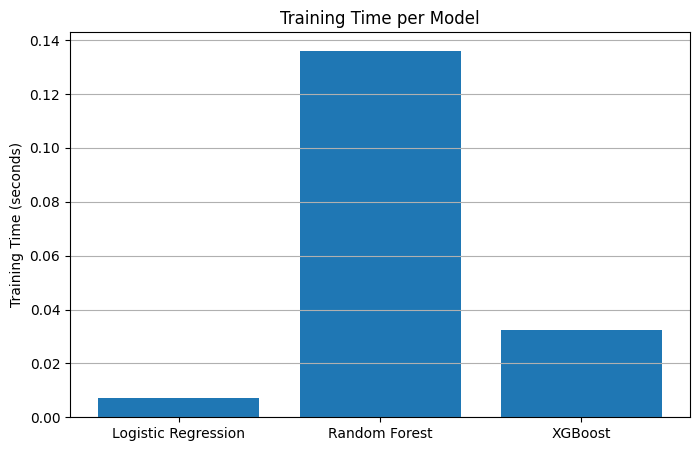

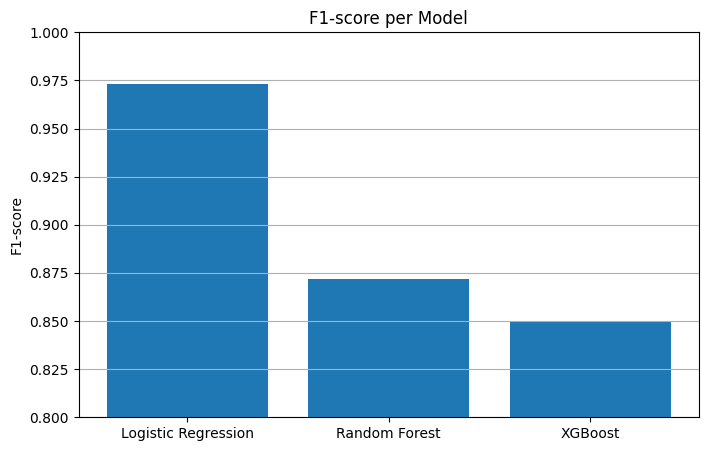

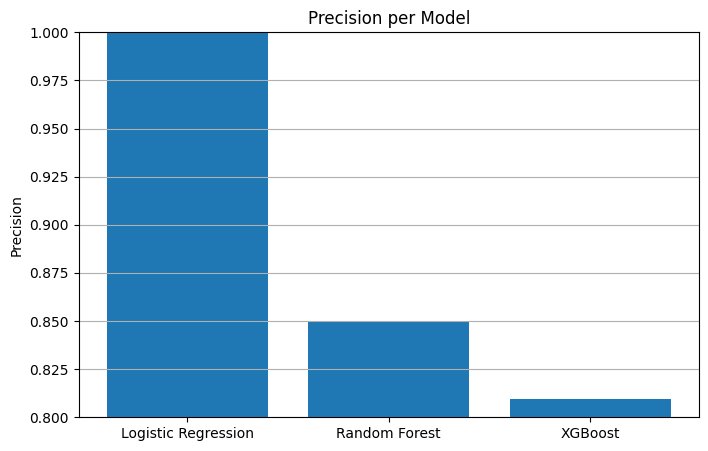

In [4]:
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, confusion_matrix, classification_report

# Initialize models
logreg = LogisticRegression(random_state=42, max_iter=1000)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Store models in a dictionary for easy iteration
models = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "XGBoost": xgb
}

# Lists to store metrics for visualization
model_names = []
train_times = []
f1_scores = []
precisions = []

# Train and evaluate each model
for name, model in models.items():
    print(f"\n====== {name} ======")

    # Training with time measurement
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time

    # Prediction and evaluation
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)

    # Store metrics
    model_names.append(name)
    train_times.append(elapsed_time)
    f1_scores.append(f1)
    precisions.append(precision)

    # Output results
    print(f"Training time: {elapsed_time:.2f} seconds")
    print(f"F1-score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))

# Visualization: Training Time
plt.figure(figsize=(8, 5))
plt.bar(model_names, train_times)
plt.ylabel("Training Time (seconds)")
plt.title("Training Time per Model")
plt.grid(axis='y')
plt.show()

# Visualization: F1-score
plt.figure(figsize=(8, 5))
plt.bar(model_names, f1_scores)
plt.ylabel("F1-score")
plt.ylim(0.8, 1.0)
plt.title("F1-score per Model")
plt.grid(axis='y')
plt.show()

# Visualization: Precision
plt.figure(figsize=(8, 5))
plt.bar(model_names, precisions)
plt.ylabel("Precision")
plt.ylim(0.8, 1.0)
plt.title("Precision per Model")
plt.grid(axis='y')
plt.show()


## Hyperparameter Tuning and Model Comparison (CV vs Holdout)

This section evaluates all three classifiers using both:
- **Holdout validation** (simple train-test split)
- **Cross-validation (CV)** via `GridSearchCV`

For each model:
- A grid of hyperparameters is defined and searched using `GridSearchCV`.
- The best F1-score from CV is stored.
- The best estimator is then evaluated on the holdout validation set.
- F1-scores for both CV and holdout are recorded in a result table.

The goal is to:
- Measure how different models respond to parameter tuning
- Compare CV vs holdout performance stability
- Identify which models and setups generalize best

Finally, the results are visualized using a bar chart comparing F1-scores across validation methods.


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Final Comparison Table:
                 Model Validation Method  F1-score
0  Logistic Regression         3-Fold CV  0.967044
1  Logistic Regression           Holdout  0.947368
2        Random Forest         5-Fold CV  0.928056
3        Random Forest           Holdout  0.871795
4              XGBoost         5-Fold CV  0.928452
5              XGBoost           Holdout  0.850000


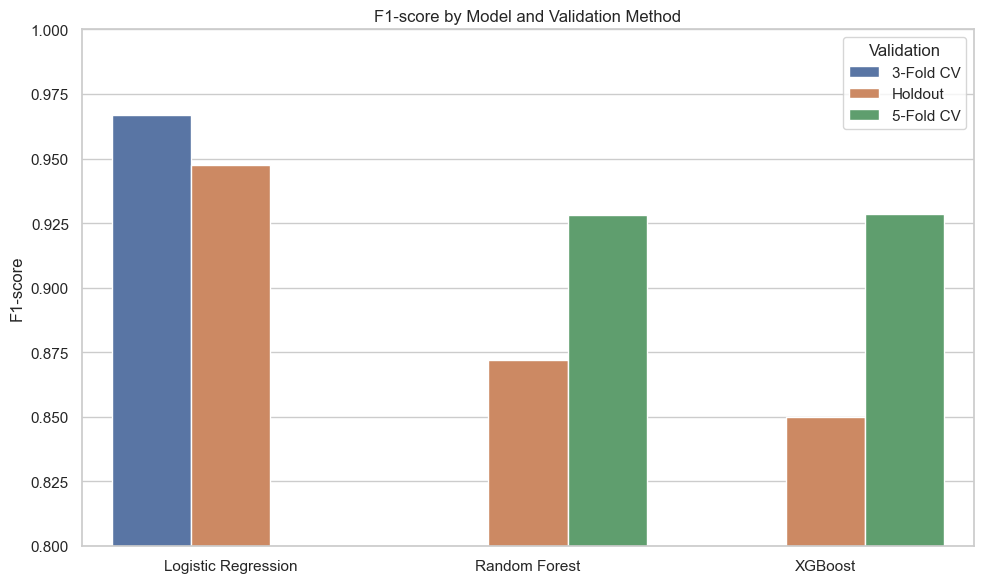

In [5]:
import pandas as pd
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Init results list (reset if rerunning)
results = []

### ========== Logistic Regression ==========

# Grid for CV
logreg_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# GridSearchCV
logreg_cv = GridSearchCV(
    estimator=LogisticRegression(max_iter=500, random_state=42),
    param_grid=logreg_param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    refit=True
)

# Fit CV
logreg_cv.fit(X_train, y_train)
mean_f1_logreg_cv = logreg_cv.cv_results_['mean_test_score'][logreg_cv.best_index_]

# Holdout
y_pred_logreg_holdout = logreg_cv.best_estimator_.predict(X_val)
f1_logreg_holdout = f1_score(y_val, y_pred_logreg_holdout)

# Store
results.append(["Logistic Regression", "3-Fold CV", mean_f1_logreg_cv])
results.append(["Logistic Regression", "Holdout", f1_logreg_holdout])

### ========== Random Forest ==========

rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 5],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# GridSearchCV
rf_cv = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    refit=True
)
rf_cv.fit(X_train, y_train)
mean_f1_rf_cv = rf_cv.cv_results_['mean_test_score'][rf_cv.best_index_]

# Holdout
y_pred_rf_holdout = rf_cv.best_estimator_.predict(X_val)
f1_rf_holdout = f1_score(y_val, y_pred_rf_holdout)

# Store
results.append(["Random Forest", "5-Fold CV", mean_f1_rf_cv])
results.append(["Random Forest", "Holdout", f1_rf_holdout])

### ========== XGBoost ==========

xgb_param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 5],
    'learning_rate': [0.1]
}

xgb_cv = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=xgb_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    refit=True
)
xgb_cv.fit(X_train, y_train)
mean_f1_xgb_cv = xgb_cv.cv_results_['mean_test_score'][xgb_cv.best_index_]

# Holdout
y_pred_xgb_holdout = xgb_cv.best_estimator_.predict(X_val)
f1_xgb_holdout = f1_score(y_val, y_pred_xgb_holdout)

# Store
results.append(["XGBoost", "5-Fold CV", mean_f1_xgb_cv])
results.append(["XGBoost", "Holdout", f1_xgb_holdout])

### ========== Final Table ==========

results_df = pd.DataFrame(results, columns=["Model", "Validation Method", "F1-score"])
print("\nFinal Comparison Table:")
print(results_df)

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plot style
sns.set(style="whitegrid")

# Barplot: F1-score by model and validation method
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df,
    x="Model",
    y="F1-score",
    hue="Validation Method"
)

plt.title("F1-score by Model and Validation Method")
plt.ylim(0.8, 1.0)
plt.ylabel("F1-score")
plt.xlabel("")
plt.legend(title="Validation")
plt.tight_layout()
plt.show()



## Final Evaluation of Best Logistic Regression Model

In this step, we evaluate the best-performing Logistic Regression model identified by `GridSearchCV`:

- The model is applied to the holdout validation set.
- A confusion matrix is printed to inspect the number of correct and incorrect predictions.
- A classification report is generated showing precision, recall, and F1-score for each class.

This helps understand the model's strengths and weaknesses beyond a single performance metric.



===== Logistic Regression =====
Training time: 0.00 sec
Accuracy: 0.9649
Precision: 0.9474
Recall: 0.9474
F1-score: 0.9474
Confusion Matrix:
 [[37  1]
 [ 1 18]]

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97        38
        True       0.95      0.95      0.95        19

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57


===== Random Forest =====
Training time: 0.12 sec
Accuracy: 0.9123
Precision: 0.8500
Recall: 0.8947
F1-score: 0.8718
Confusion Matrix:
 [[35  3]
 [ 2 17]]

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.92      0.93        38
        True       0.85      0.89      0.87        19

    accuracy                           0.91        57
   macro avg       0.90      0.91      0.90        57
weighted avg       0.91      0.91

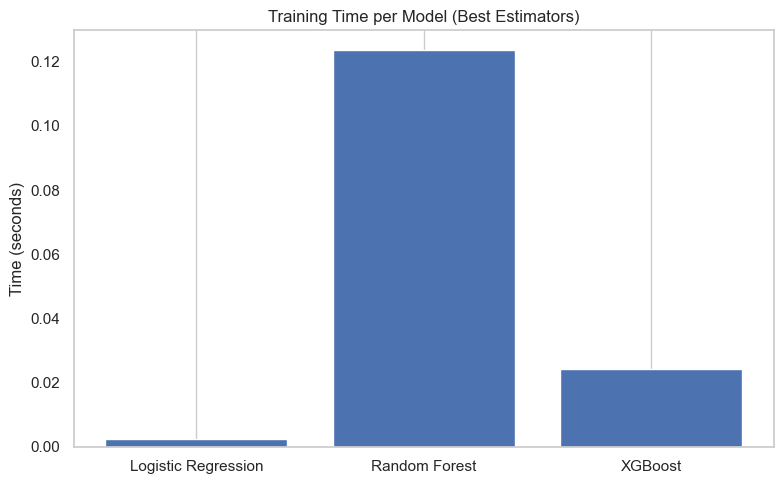

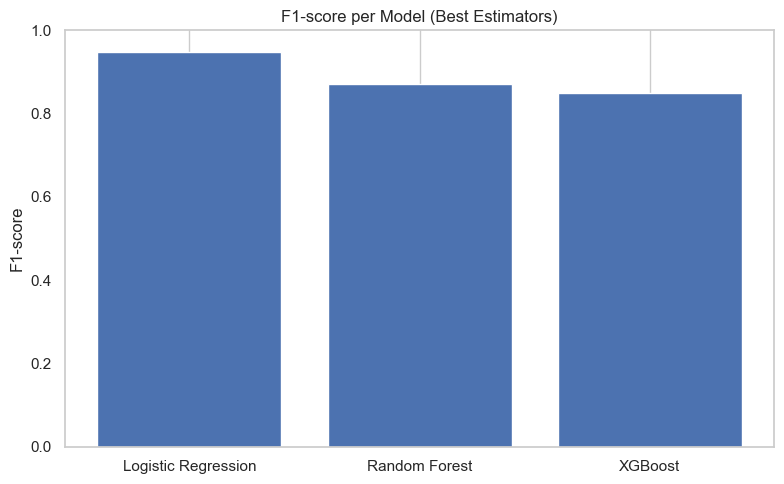

In [6]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import pandas as pd

# Assume these already exist from previous GridSearchCV:
# logreg_cv, rf_cv, xgb_cv
# Also assume X_train, X_val, y_train, y_val

# Koristi best_estimator_ iz prethodnog GridSearchCV
best_models = {
    "Logistic Regression": logreg_cv.best_estimator_,
    "Random Forest": rf_cv.best_estimator_,
    "XGBoost": xgb_cv.best_estimator_
}

# Storage za rezultate
results = []

# Evaluation loop
for name, model in best_models.items():
    print(f"\n===== {name} =====")
    start_time = time.time()
    model.fit(X_train, y_train)  # Refit na cijelom trening skupu (ako treba)
    elapsed_time = time.time() - start_time

    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Store results
    results.append({
        "Model": name,
        "Training Time (s)": elapsed_time,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })

    # Print evaluation
    print(f"Training time: {elapsed_time:.2f} sec")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Create summary DataFrame
results_df = pd.DataFrame(results)
print("\n===== Summary Results =====")
print(results_df)

# Plot training time
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['Training Time (s)'])
plt.title("Training Time per Model (Best Estimators)")
plt.ylabel("Time (seconds)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot F1-score
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['F1-score'])
plt.title("F1-score per Model (Best Estimators)")
plt.ylabel("F1-score")
plt.ylim(0.0, 1.0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# 1. Load the test set
test_df = pd.read_csv("/Users/hhodzic/Downloads/184-702-tu-ml-2025-s-breast-cancer-diagnostic/breast-cancer-diagnostic.shuf.tes.csv")

# 2. Save the IDs and prepare features
test_ids = test_df["ID"]
X_test = test_df.drop(columns=["ID"])
X_test_scaled = scaler.transform(X_test)  # use the already fitted scaler from training

# 3. Use best model from GridSearchCV and retrain on full training set
final_logreg = logreg_cv.best_estimator_  # <-- use tuned model
final_logreg.fit(X_scaled, y)             # <-- retrain on ALL available data

# 4. Predict on the test set
y_test_pred = final_logreg.predict(X_test_scaled)

# 5. Create a DataFrame for Kaggle submission
submission_df = pd.DataFrame({
    "ID": test_ids,
    "class": y_test_pred
})

# 6. Save the CSV file
submission_df.to_csv("kaggle_logreg1_submission.csv", index=False)
print("Kaggle submission file saved as 'kaggle_logreg_submission.csv'")


Kaggle submission file saved as 'kaggle_logreg_submission.csv'


In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

xgb_grid = GridSearchCV(
    xgb_model,
    xgb_params,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)
print("Best XGBoost params:", xgb_grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best XGBoost params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [9]:
# 1. Treniraj najbolji XGBoost model na cijelom trening skupu
best_xgb = xgb_grid.best_estimator_
best_xgb.fit(X_scaled, y)

# 2. Predikcija na test skupu
y_test_pred = best_xgb.predict(X_test_scaled)

# 3. Priprema za Kaggle
submission_df = pd.DataFrame({
    "ID": test_ids,
    "class": y_test_pred
})


submission_df.to_csv("kaggle_xgb_submission.csv", index=False)
print("Spremno za Kaggle kao 'kaggle_xgb_submission.csv'")


Spremno za Kaggle kao 'kaggle_xgb_submission.csv'


In [10]:
from sklearn.metrics import f1_score
import numpy as np

# Get predicted probabilities for class True (positive class)
y_val_probs = final_logreg.predict_proba(X_val)[:, 1]

# Try different thresholds
thresholds = np.arange(0.3, 0.7, 0.01)
f1_scores = []

for t in thresholds:
    y_val_pred_thresh = (y_val_probs >= t)
    f1 = f1_score(y_val, y_val_pred_thresh)
    f1_scores.append(f1)

# Find best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold: {best_threshold:.2f} with F1-score: {best_f1:.4f}")


Best threshold: 0.34 with F1-score: 0.9730


In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Load the training set
df = pd.read_csv('/Users/hhodzic/Downloads/184-702-tu-ml-2025-s-breast-cancer-diagnostic/breast-cancer-diagnostic.shuf.lrn.csv')

# 2. Prepare the data
X = df.drop(columns=["ID", "class"])
y = df["class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train Logistic Regression
final_logreg = LogisticRegression(random_state=42, max_iter=1000)
final_logreg.fit(X_train, y_train)

# 5. Predict probabilities on the validation set
y_val_probs = final_logreg.predict_proba(X_val)[:, 1]

# 6. Find the best threshold for F1-score
thresholds = np.arange(0.3, 0.7, 0.01)
f1_scores = []

for t in thresholds:
    y_val_pred_thresh = (y_val_probs >= t)
    f1 = f1_score(y_val, y_val_pred_thresh)
    f1_scores.append(f1)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold: {best_threshold:.2f} with F1-score: {best_f1:.4f}")

# 7. Load the test set
test_df = pd.read_csv('/Users/hhodzic/Downloads/184-702-tu-ml-2025-s-breast-cancer-diagnostic/breast-cancer-diagnostic.shuf.tes.csv')
test_ids = test_df["ID"]
X_test = test_df.drop(columns=["ID"])
X_test_scaled = scaler.transform(X_test)

# 8. Predict using the tuned threshold
y_test_probs = final_logreg.predict_proba(X_test_scaled)[:, 1]
y_test_pred_thresh = (y_test_probs >= best_threshold)

# 9. Save the Kaggle submission CSV file
submission_thresh = pd.DataFrame({
    "ID": test_ids,
    "class": y_test_pred_thresh
})
submission_thresh.to_csv("kaggle_logreg_threshold_submission.csv", index=False)
print("Kaggle submission file saved as 'kaggle_logreg_threshold_submission.csv'")


Best threshold: 0.34 with F1-score: 0.9730
Kaggle submission file saved as 'kaggle_logreg_threshold_submission.csv'


In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np

# Thresholds to evaluate
thresholds = np.arange(0.3, 0.71, 0.01)
f1_results = np.zeros((5, len(thresholds)))  # 5 folds × len(thresholds)

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_idx, (train_index, val_index) in enumerate(skf.split(X_scaled, y)):
    X_train_cv, X_val_cv = X_scaled[train_index], X_scaled[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    # Train Logistic Regression
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_cv, y_train_cv)

    # Predicted probabilities for the positive class
    y_val_probs = model.predict_proba(X_val_cv)[:, 1]

    # Evaluate F1-score across all thresholds
    for i, t in enumerate(thresholds):
        y_pred_thresh = (y_val_probs >= t)
        f1 = f1_score(y_val_cv, y_pred_thresh)
        f1_results[fold_idx, i] = f1

# Average F1-score for each threshold
mean_f1 = np.mean(f1_results, axis=0)
best_idx = np.argmax(mean_f1)
best_threshold = thresholds[best_idx]
best_f1 = mean_f1[best_idx]

print(f"Best threshold via cross-validation: {best_threshold:.2f}")
print(f"Mean F1-score across folds: {best_f1:.4f}")


Best threshold via cross-validation: 0.37
Mean F1-score across folds: 0.9843


In [13]:
# 1. Treniraj Logistic Regression na cijelom trening skupu
final_logreg_cv = LogisticRegression(random_state=42, max_iter=1000)
final_logreg_cv.fit(X_scaled, y)

# 2. Predikcija vjerovatnoće na test skupu
y_test_probs = final_logreg_cv.predict_proba(X_test_scaled)[:, 1]
y_test_pred_thresh = (y_test_probs >= 0.37)

# 3. Spremi .csv
submission_cv = pd.DataFrame({
    "ID": test_ids,
    "class": y_test_pred_thresh
})
submission_cv.to_csv("kaggle_logreg_cv_threshold_submission.csv", index=False)
print(" Finalni submission fajl spreman: 'kaggle_logreg_cv_threshold_submission.csv'")


 Finalni submission fajl spreman: 'kaggle_logreg_cv_threshold_submission.csv'


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Parameters for tuning (reasonable range)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Model
rf = RandomForestClassifier(random_state=42)

# Stratified 5-Fold Cross-Validation with GridSearch
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_grid = GridSearchCV(estimator=rf,
                       param_grid=rf_param_grid,
                       scoring='f1',
                       cv=cv,
                       n_jobs=-1,
                       verbose=1)

# Fit on the entire training set
rf_grid.fit(X_scaled, y)

# Display the best parameters
print("Best Random Forest parameters:")
print(rf_grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [15]:
from sklearn.ensemble import RandomForestClassifier

# 1. Train the final Random Forest on the entire training set
best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
best_rf.fit(X_scaled, y)

# 2. Make predictions on the test set
y_test_pred_rf = best_rf.predict(X_test_scaled)

# 3. Save the Kaggle submission CSV
submission_rf = pd.DataFrame({
    "ID": test_ids,
    "class": y_test_pred_rf
})
submission_rf.to_csv("kaggle_randomforest_submission.csv", index=False)
print("Kaggle submission file saved as 'kaggle_randomforest_submission.csv'")

Kaggle submission file saved as 'kaggle_randomforest_submission.csv'


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Recalculate the correlation matrix (on the original scaled features)
df_features = pd.DataFrame(X_scaled, columns=X.columns)
corr_matrix = df_features.corr().abs()

# 2. Find pairs with high correlation (above 0.9), excluding the main diagonal
high_corr_pairs = []
threshold = 0.9
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            high_corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

# 3. Print the results
print("Highly correlated feature pairs (corr > 0.9):")
for f1, f2, corr_val in high_corr_pairs:
    print(f"{f1} <-> {f2} = {corr_val:.2f}")

# 4. (Optional) Heatmap for visualization
#plt.figure(figsize=(12, 10))
#sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
#plt.title("Correlation matrix")
#plt.show()


Highly correlated feature pairs (corr > 0.9):
radiusMean <->  perimeterMean = 1.00
radiusMean <->  areaMean = 0.99
radiusMean <->  radiusWorst = 0.97
radiusMean <->  perimeterWorst = 0.97
radiusMean <->  areaWorst = 0.95
 textureMean <->  textureWorst = 0.91
 perimeterMean <->  areaMean = 0.99
 perimeterMean <->  radiusWorst = 0.98
 perimeterMean <->  perimeterWorst = 0.97
 perimeterMean <->  areaWorst = 0.95
 areaMean <->  radiusWorst = 0.97
 areaMean <->  perimeterWorst = 0.97
 areaMean <->  areaWorst = 0.97
 concavityMean <->  concavePointsMean = 0.94
 concavePointsMean <->  concavePointsWorst = 0.92
 radiusStdErr <->  perimeterStdErr = 0.96
 radiusStdErr <->  areaStdErr = 0.96
 perimeterStdErr <->  areaStdErr = 0.93
 radiusWorst <->  perimeterWorst = 0.99
 radiusWorst <->  areaWorst = 0.99
 perimeterWorst <->  areaWorst = 0.98
 compactnessWorst <->  concavityWorst = 0.91


In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define individual models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Combined ensemble model
ensemble = VotingClassifier(
    estimators=[
        ('lr', logreg),
        ('rf', rf)
    ],
    voting='soft'  # use predict_proba
)

# Train the ensemble on the entire training set
ensemble.fit(X_scaled, y)

# Predict on the test set
y_test_pred_ensemble = ensemble.predict(X_test_scaled)

# Save predictions to a CSV file for Kaggle
submission_ensemble = pd.DataFrame({
    "ID": test_ids,
    "class": y_test_pred_ensemble
})
submission_ensemble.to_csv("kaggle_ensemble_logreg_rf.csv", index=False)
print("Ensemble submission saved as 'kaggle_ensemble_logreg_rf.csv'")

Ensemble submission saved as 'kaggle_ensemble_logreg_rf.csv'


In [18]:
# 1. Ponovno kreiraj korelacionu matricu
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 2. Nađi sve kolone koje treba ukloniti (korelacija iznad 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("📤 Features to drop due to high correlation (>0.9):")
print(to_drop)

# 3. Napravi novu verziju X sa smanjenim brojem feature-a
X_reduced = df_features.drop(columns=to_drop)

print(f" Reduced feature set shape: {X_reduced.shape}")


📤 Features to drop due to high correlation (>0.9):
[' perimeterMean', ' areaMean', ' concavePointsMean', ' perimeterStdErr', ' areaStdErr', ' radiusWorst', ' textureWorst', ' perimeterWorst', ' areaWorst', ' concavityWorst', ' concavePointsWorst']
 Reduced feature set shape: (285, 19)


In [19]:
# 1. Scale the reduced feature set
scaler_reduced = StandardScaler()
X_reduced_scaled = scaler_reduced.fit_transform(X_reduced)

# 2. Drop the same columns from the test set
X_test_reduced = pd.DataFrame(X_test, columns=X.columns).drop(columns=to_drop)
X_test_reduced_scaled = scaler_reduced.transform(X_test_reduced)

# 3. Train Logistic Regression
logreg_reduced = LogisticRegression(max_iter=1000, random_state=42)
logreg_reduced.fit(X_reduced_scaled, y)

# 4. Predict on the test set
y_test_pred_reduced = logreg_reduced.predict(X_test_reduced_scaled)

# 5. Save Kaggle submission
submission_reduced = pd.DataFrame({
    "ID": test_ids,
    "class": y_test_pred_reduced
})
submission_reduced.to_csv("kaggle_logreg_reduced_submission.csv", index=False)
print("Kaggle submission file saved as 'kaggle_logreg_reduced_submission.csv'")


Kaggle submission file saved as 'kaggle_logreg_reduced_submission.csv'


In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1. Define individual models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# 2. Create VotingClassifier with soft voting
ensemble = VotingClassifier(
    estimators=[('lr', logreg), ('rf', rf)],
    voting='soft'
)

# 3. Train on the full training set
ensemble.fit(X_scaled, y)

# 4. Predict probability for the positive class
y_probs = ensemble.predict_proba(X_test_scaled)[:, 1]

# 5. Apply tuned threshold (e.g., 0.37)
best_threshold = 0.37
y_pred_thresh = (y_probs >= best_threshold).astype(int)

# 6. Save submission for Kaggle
submission_ensemble_thresh = pd.DataFrame({
    "ID": test_ids,
    "class": y_pred_thresh
})
submission_ensemble_thresh.to_csv("kaggle_ensemble_thresh_submission.csv", index=False)
print("Ensemble with tuned threshold saved as 'kaggle_ensemble_thresh_submission.csv'")


Ensemble with tuned threshold saved as 'kaggle_ensemble_thresh_submission.csv'


In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# 1. Define individual models with tuning (use your best_estimator_ if available)
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Use best versions from GridSearchCV if available
rf = rf_cv.best_estimator_     # Random Forest from previous tuning
xgb = xgb_cv.best_estimator_   # XGBoost from previous tuning

# 2. Create VotingClassifier with soft voting and weights
ensemble = VotingClassifier(
    estimators=[('lr', logreg), ('rf', rf), ('xgb', xgb)],
    voting='soft',
    weights=[2, 1, 2]  # Adjust based on model performance
)

# 3. Fit ensemble on the full training set
ensemble.fit(X_scaled, y)

# 4. Predict probabilities for the positive class on the test set
y_probs = ensemble.predict_proba(X_test_scaled)[:, 1]

# 5. Apply best tuned threshold
best_threshold = 0.37  # From previous cross-validation tuning
y_pred_thresh = (y_probs >= best_threshold).astype(int)

# 6. Create Kaggle submission DataFrame
submission_ensemble_thresh = pd.DataFrame({
    "ID": test_ids,
    "class": y_pred_thresh
})

# 7. Save to CSV
submission_ensemble_thresh.to_csv("kaggle_111ensemble_thresh_submission.csv", index=False)
print("Kaggle submission with ensemble and tuned threshold saved as 'kaggle_ensemble_thresh_submission.csv'")


Kaggle submission with ensemble and tuned threshold saved as 'kaggle_ensemble_thresh_submission.csv'


In [22]:
# Note:
# A more complex ensemble combining Logistic Regression, Random Forest, and XGBoost
# with weighted soft voting and a tuned threshold was tested.
# However, this configuration resulted in a ~2% drop in F1-score compared to the simpler ensemble
# that included only Logistic Regression and Random Forest.
# This suggests that in this case, the simpler ensemble generalized better and was more robust on the given dataset.
